In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome 1: diabetes 0: no diabetes

Pregnancies number of times pregnant


In [4]:
data.shape

(768, 9)

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Text(0, 0.5, 'Number of people')

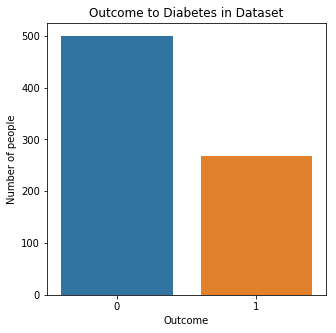

In [6]:
plt.figure(figsize=(5,5))
sns.countplot(x='Outcome',data=data)
plt.title('Outcome to Diabetes in Dataset')
plt.ylabel('Number of people')

In [7]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

We have 268 person with diabetes and 500 whithout it. We can clearly see that is an unbalanced dataset. It is critical to know this for a few reasons:

The algorithms of machine learning like LogisticRegression os SVM, tend to think that the data is balanced. But if the data is unbalanced they will put more weight on the majority class. The accuracy is not a useful metric now. Because of that we use other metrics, such as Roc_Auc, sensitivity, specificity...


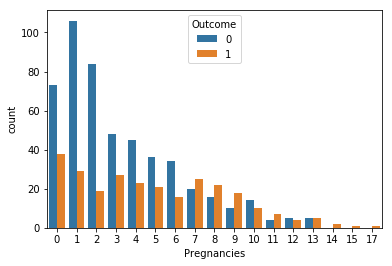

In [8]:
sns.countplot(x='Pregnancies',data=data,hue='Outcome')

In [9]:
print('Average number of pregnancies for positive outcomes: ' + str(data[data['Outcome']==1]['Pregnancies'].mean()))
print('Average number of pregnancies for negative outcomes: ' + str(data[data['Outcome']==0]['Pregnancies'].mean()))

Average number of pregnancies for positive outcomes: 4.865671641791045
Average number of pregnancies for negative outcomes: 3.298


C:\Users\Ewa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


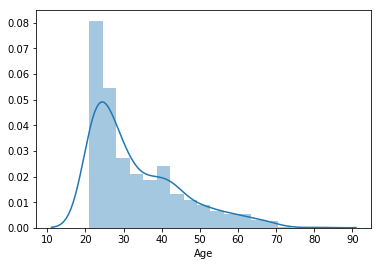

In [10]:
sns.distplot(data['Age'])

Text(0.5, 0, 'Age')

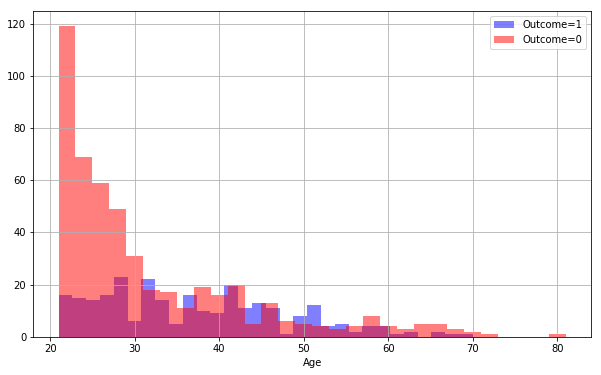

In [11]:
plt.figure(figsize=(10,6))
data[data['Outcome']==1]['Age'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Outcome=1')
data[data['Outcome']==0]['Age'].hist(alpha=0.5,color='red',
                                              bins=30,label='Outcome=0')
plt.legend()
plt.xlabel('Age')

In [12]:
# define X and y
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']
X=data[feature_cols]
y=data['Outcome']

In [13]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [14]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
# make class predictions for the testing set
y_pred_class = clf.predict(X_test)

In [16]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334


Classification accuracy is 69%
Null accuracy: accuracy that could be achieved by always predicting the most frequent class. Another words:Baseline accuracy that can be achieved by always predicting the most frequent class (“B has the highest frequency, so lets guess B every time”).


In [17]:
# examine the class distribution of the testing set
y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

In [18]:
# calculate null accuracy in a single line of code
# only for binary classification problems coded as 0/1

max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

This means that a dumb model that always predicts 0 would be right 68% of the time. This shows how classification accuracy is not that good as it's close to a dumb model


In [19]:
# calculate null accuracy (for multi-class classification problems)

y_test.value_counts().head(1) / len(y_test)

0    0.677083
Name: Outcome, dtype: float64

Classification accuracy is the easiest classification metric to understand. But, it does not tell you the underlying distribution of response values. We examine by calculating the null accuracy


In [20]:
confusion = metrics.confusion_matrix(y_test,y_pred_class)
print(confusion)

[[118  12]
 [ 47  15]]


column 0 = PREDICTED 0

column 1 = PREDICTED 1

row 0 = ACTUAL 0

row 1 = ACTUAL 1

True Positives (TP): we correctly predicted that they do have diabetes
15

True Negatives (TN): we correctly predicted that they don't have diabetes
118

False Positives (FP): we incorrectly predicted that they do have diabetes (a "Type I error")
12

False Negatives (FN): we incorrectly predicted that they don't have diabetes (a "Type II error")
47



In [21]:
# print the first 10 true and predicted responses
print('True', y_test.values[0:10])
print('Pred', y_pred_class[0:10])

True [1 0 0 1 0 0 1 1 0 0]
Pred [0 0 0 0 0 0 0 1 0 1]


In [22]:
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[118  12]
 [ 47  15]]


Metrics computed from a confusion matrix:

In [24]:
# Classification Accuracy

accuracy=(TP + TN) / float(TP + TN + FP + FN)
print(accuracy)
print(metrics.accuracy_score(y_test, y_pred_class))

0.6927083333333334
0.6927083333333334


In [25]:
# Sensitivity also known as "True Positive Rate" or "Recall"
# When the actual value is positive, how often is the prediction correct?

sensitivity = TP / float(FN + TP)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.24193548387096775
0.24193548387096775


In [26]:
# Specificity
# When the actual value is negative, how often is the prediction correct?

specificity = TN / (TN + FP)
print(specificity)

0.9076923076923077


In [27]:
# False Positive Rate
# When the actual value is negative, how often is the prediction incorrect?

false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)
print(1 - specificity)

0.09230769230769231
0.09230769230769231


In [28]:
# Precision
# When a positive value is predicted, how often is the prediction correct?

precision = TP / float(TP + FP)
print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5555555555555556
0.5555555555555556


In [29]:
# print the first 10 predicted responses
clf.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [30]:
# print the first 10 predicted probabilities of class membership

clf.predict_proba(X_test)[0:10]

# each row, numbers sum to 1
# column 0: predicted probability that each observation is a member of class 0
# column 1: predicted probability that each observation is a member of class 1
# there is a 0.5 classification threshold

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [31]:
# print the first 10 predicted probabilities for class 
clf.predict_proba(X_test)[0:10, 1]

array([0.36752429, 0.28356344, 0.28895886, 0.4141062 , 0.15896027,
       0.17065156, 0.49889026, 0.51341541, 0.27678612, 0.67189438])

In [32]:
y_pred_prob=clf.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

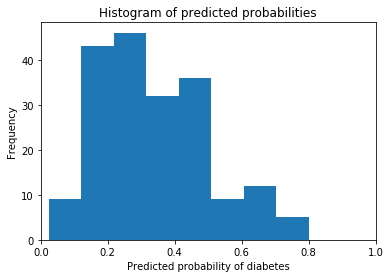

In [33]:
plt.hist(y_pred_prob, bins=8)
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

We can see small number of observations with probability > 0.5 in this case most would be predicted "no diabetes" . What can we do in this situation? We should decrease the threshold for predicting diabetes, another words - increase the sensitivity of the classifier (increase the number of TP).


In [34]:
from sklearn.preprocessing import binarize
y_pred_prob=clf.predict_proba(X_test)
y_pred_class = binarize(y_pred_prob, 0.3)[:,1]
y_pred_prob[0:10]

array([[0.63247571, 0.36752429],
       [0.71643656, 0.28356344],
       [0.71104114, 0.28895886],
       [0.5858938 , 0.4141062 ],
       [0.84103973, 0.15896027],
       [0.82934844, 0.17065156],
       [0.50110974, 0.49889026],
       [0.48658459, 0.51341541],
       [0.72321388, 0.27678612],
       [0.32810562, 0.67189438]])

In [35]:
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [36]:
# old confusion matrix (threshold of 0.5)
confusion

array([[118,  12],
       [ 47,  15]], dtype=int64)

In [37]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[80 50]
 [16 46]]


Observations from the left column (in old confusion) moving to the right column because we will have more TP and FP. The row totals are the same


In [38]:
# sensitivity has increased (used to be 0.24)
print (46 / float(46 + 16))

0.7419354838709677


In [39]:
# specificity has decreased (used to be 0.91)
print(80 / float(80 + 50))

0.6153846153846154


In [40]:
# precision has decreased (used to be 0,55)
precision = TP / float(TP + FP)
print(46/float(46+50))

0.4791666666666667


IMPORTANT:Precision and specificity are not the same, but they have similar meanings. We calculate specificity to be able to draw a ROC chart


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71       130
           1       0.48      0.74      0.58        62

   micro avg       0.66      0.66      0.66       192
   macro avg       0.66      0.68      0.65       192
weighted avg       0.72      0.66      0.67       192



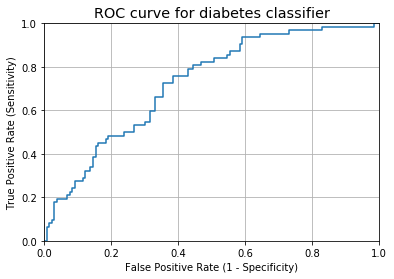

In [42]:
# Receiver Operating Characteristic (ROC) Curves

# first argument is true values, second argument is predicted probabilities
# roc_curve returns 3 objects fpr, tpr, thresholds
# fpr: false positive rate (1-specificity)
# tpr: true positive rate (sensitivity)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

ROC curve can help to choose a threshold that balances sensitivity and specificity(or precision) in a way that makes sense for particular context


In [43]:
# define a function that accepts a threshold and prints sensitivity and specificity
def change_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [44]:
change_threshold(0.5)

Sensitivity: 0.24193548387096775
Specificity: 0.9076923076923077


In [45]:
change_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6153846153846154


In [46]:
# AUC,higher value = better classifier
print(metrics.roc_auc_score(y_test, y_pred_prob[:,1]))

0.7245657568238213


In [47]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10, scoring='roc_auc').mean()

C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ewa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

0.7378233618233618

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
knn_pred_prob=knn.predict_proba(X_test)
print(metrics.accuracy_score(y_test, knn_pred))

0.7291666666666666


Choosing a K Value

In [49]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

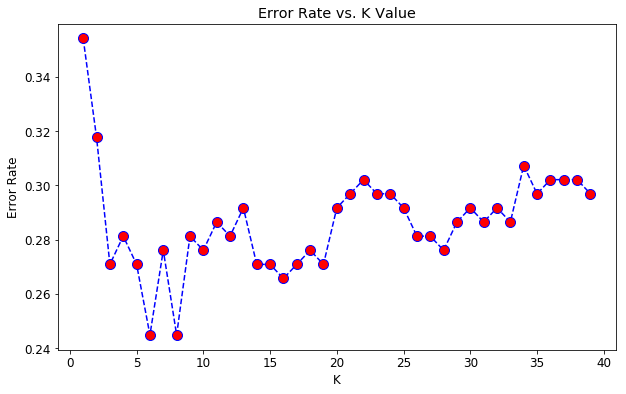

In [50]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [51]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_pred_prob=knn.predict_proba(X_test)

print(metrics.accuracy_score(y_test, knn_pred))

0.7552083333333334


In [52]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
dtree_pred_prob=dtree.predict_proba(X_test)

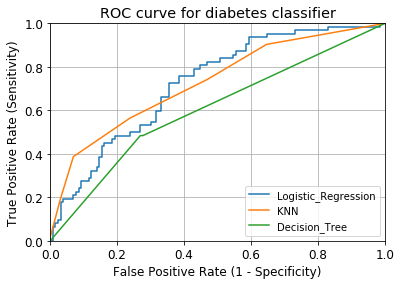

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1])
knn_fpr,knn_tpr,knn_thresholds = metrics.roc_curve(y_test, knn_pred_prob[:,1])
dtree_fpr, dtree_tpr, dtree_thresholds = metrics.roc_curve(y_test, dtree_pred_prob[:,1])

plt.plot(fpr, tpr,label="Logistic_Regression")
plt.plot(knn_fpr, knn_tpr,label='KNN')
plt.plot(dtree_fpr, dtree_tpr,label="Decision_Tree")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

In [55]:
print('clf:{}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print('knn:{}'.format(metrics.accuracy_score(y_test, knn_pred)))
print('dtree:{}'.format(metrics.accuracy_score(y_test, dtree_pred)))

clf:0.65625
knn:0.7552083333333334
dtree:0.6510416666666666
